In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

In [2]:
N = 1000; Ne = int( 0.8*N ); Ni = int( 0.2*N );

T = 4000; # total time we want to simulate, 4 s
dt = 1; # 1 ms temporal resolution

time = np.linspace(dt,T, int(T/dt)) # time in ms

In [3]:
# decide which 20% neurons are inhibitory
inhibitory_indx = np.sort(np.random.choice(range(N),Ni,replace=False))
inhibitory_indx

array([  5,  10,  17,  21,  26,  28,  31,  35,  48,  56,  60,  65,  66,
        68,  73,  79,  81,  91,  93, 105, 107, 111, 115, 124, 130, 137,
       149, 155, 160, 164, 166, 168, 175, 183, 184, 192, 201, 221, 225,
       229, 230, 235, 242, 254, 257, 261, 262, 271, 279, 283, 284, 286,
       291, 294, 300, 303, 304, 308, 310, 314, 320, 321, 329, 334, 338,
       341, 342, 343, 347, 349, 351, 359, 361, 364, 372, 375, 376, 380,
       382, 384, 385, 389, 395, 397, 403, 404, 409, 415, 420, 426, 427,
       433, 441, 445, 453, 456, 462, 463, 472, 480, 495, 497, 503, 504,
       509, 513, 518, 529, 530, 540, 544, 549, 556, 558, 564, 570, 578,
       589, 591, 595, 596, 597, 608, 610, 615, 618, 619, 623, 625, 628,
       631, 634, 635, 641, 643, 646, 652, 653, 658, 664, 674, 682, 686,
       691, 709, 711, 723, 726, 727, 733, 734, 737, 740, 741, 743, 745,
       747, 749, 753, 754, 763, 785, 786, 789, 790, 799, 807, 813, 814,
       819, 828, 829, 832, 834, 846, 870, 886, 889, 895, 897, 89

In [4]:
J0 = 0.3; J1 = 0.015; J2 = 0.02; l = 0.15
sigma = 1.8

x0 = time/T
I0 = 1.02
lambda_e = 0.03
lambda_i = 0.02
Vres = 0.85
theta = 1

# i-d array, storing the position of each neuron
# positions = np.linspace(0,1,N,endpoint=False)
positions = np.random.uniform(0,1,N)

# pre-define Jij_ex
Jij_ex = np.zeros([N, N])

In [5]:
def s_in():
    rand = np.random.uniform(0,1,1)
    if rand<0.7:
        return 1
    else:
        return 0
    
def s_ex():
    rand = np.random.uniform(0,1,1)
    if rand<0.2:
        return 1
    else:
        return 0

In [6]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

In [7]:
# Equ. 8
def sigma_ij_comp(i,j,sigma):
    if i<j:
        result = 1
    else:
        result = sigma
    return result

In [8]:
def Jij_ex_comp(i, j):
    sigma_ij = sigma_ij_comp(i,j,sigma)
    result = sigma_ij * J1 * np.exp(-np.abs(positions[i]-positions[j])/l)
    return result

In [9]:
def Jij_in_comp(i, j):
    sigma_ij = sigma_ij_comp(i,j,sigma)
    result = sigma_ij * J2 * np.exp(-np.abs(positions[i]-positions[j])/l)
    return result

In [10]:
# compute each element of Jij_ex, treat Jij_ex as a constant matrix
for ii in range(N):
    for jj in range(N):
        Jij_ex[ii,jj] = Jij_ex_comp(ii,jj)
    
Jij_ex

array([[2.70000000e-02, 1.43906171e-02, 4.72909291e-05, ...,
        3.05796442e-03, 1.44582299e-02, 4.94266304e-05],
       [2.59031107e-02, 2.70000000e-02, 4.92935038e-05, ...,
        3.18745653e-03, 1.49298537e-02, 5.15196432e-05],
       [8.51236723e-05, 8.87283068e-05, 2.70000000e-02, ...,
        2.31972593e-04, 4.90629865e-05, 1.43518571e-02],
       ...,
       [5.50433595e-03, 5.73742175e-03, 4.17550668e-04, ...,
        2.70000000e-02, 3.17255063e-03, 2.42448687e-04],
       [2.60248137e-02, 2.68737366e-02, 8.83133757e-05, ...,
        5.71059114e-03, 2.70000000e-02, 5.12787156e-05],
       [8.89679348e-05, 9.27353578e-05, 2.58333428e-02, ...,
        4.36407636e-04, 9.23016881e-05, 2.70000000e-02]])

In [11]:
# compute each element of Jij_in, treat Jij_in as a constant matrix
Jij_in = np.zeros([N, N])
for ii in range(N):
    for jj in range(N):
        Jij_in[ii,jj] = Jij_in_comp(ii,jj)
    
Jij_in

array([[3.60000000e-02, 1.91874894e-02, 6.30545721e-05, ...,
        4.07728589e-03, 1.92776398e-02, 6.59021739e-05],
       [3.45374809e-02, 3.60000000e-02, 6.57246717e-05, ...,
        4.24994203e-03, 1.99064715e-02, 6.86928576e-05],
       [1.13498230e-04, 1.18304409e-04, 3.60000000e-02, ...,
        3.09296791e-04, 6.54173154e-05, 1.91358094e-02],
       ...,
       [7.33911460e-03, 7.64989566e-03, 5.56734224e-04, ...,
        3.60000000e-02, 4.23006751e-03, 3.23264915e-04],
       [3.46997516e-02, 3.58316488e-02, 1.17751168e-04, ...,
        7.61412152e-03, 3.60000000e-02, 6.83716208e-05],
       [1.18623913e-04, 1.23647144e-04, 3.44444570e-02, ...,
        5.81876848e-04, 1.23068917e-04, 3.60000000e-02]])

In [12]:
# Equ. 9
I_ext_ex = np.zeros([Ne, len(time)])

for i in range(Ne):
    for t in range(len(time)):
        I_ext_ex[i,t] = I0 * (1 + lambda_e*np.exp(-np.abs(positions[i]-x0[t])/l))
I_ext_ex

array([[1.03784862, 1.03787839, 1.03790821, ..., 1.0200671 , 1.02006699,
        1.02006688],
       [1.03712351, 1.03715207, 1.03718068, ..., 1.02006994, 1.02006982,
        1.02006971],
       [1.02005627, 1.02005637, 1.02005646, ..., 1.04128269, 1.04124725,
        1.04121187],
       ...,
       [1.0240924 , 1.02409923, 1.02410607, ..., 1.02029264, 1.02029216,
        1.02029167],
       [1.02027056, 1.02027101, 1.02027146, ..., 1.02442642, 1.02441904,
        1.02441169],
       [1.03041812, 1.0304355 , 1.03045291, ..., 1.02011496, 1.02011476,
        1.02011457]])

In [13]:
# Equ. 10
I_ext_in = np.zeros(len(time))

for t in range(len(time)):
    I_ext_in[t] = I0 * (1 + lambda_i * np.cos(2*np.pi*time[t]*8/1000)) # 6-9 Hz

I_ext_in

array([1.04037423, 1.040297  , 1.0401685 , ..., 1.040297  , 1.04037423,
       1.0404    ])

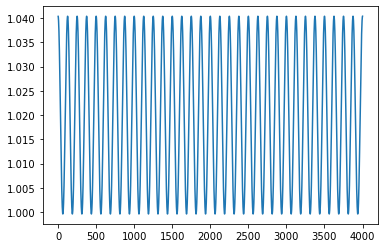

In [14]:
plt.plot(time, I_ext_in)

In [15]:
# I_ext = combine I_ext_ex and I_ext_in
I_ext = np.zeros([N, len(time)])
cnt_ex = 0
cnt_in = 0
for i in range(N):
    if i in inhibitory_indx:
        I_ext[i,:] = I_ext_in
        cnt_in = cnt_in + 1
    else:
        I_ext[i,:] = I_ext_ex[cnt_ex,:]
        cnt_ex = cnt_ex + 1

In [16]:
def delta_kronecker(delta_t):
    if delta_t == 0:
        return 1
    else:
        return 0

In [17]:
# compute I_ex and I_in
I_ex = np.zeros([N, len(time)])
I_in = np.zeros([N, len(time)])

t_spike = np.zeros([N, len(time)])

Is = I_ex - I_in

V = np.zeros([N, len(time)])
V[:,0] = Vres

In [18]:
tau_ex = 6
tau_in = 4
tau = 20

In [19]:
# Equ. 3
def integrate_and_fire(V, t_spike_time, t, Is):
    dV = dt*(-V[:,t-1] + Is[:,t-1] + I_ext[:,t-1])/tau
    V[:,t] = V[:,t-1] + dV
    for i in range(N):
        if V[i,t]>theta:
            t_spike_time[i,t] = 1
            V[i,t] = Vres
            
        if i in inhibitory_indx:
            I_in[i,t] = I_in[i,t-1] + dt*(-I_in[i,t-1]/tau_in + s_in()*np.dot(Jij_in[i,:],t_spike_time[:,t-1]))
        else:
            I_ex[i,t] = I_ex[i,t-1] + dt*(-I_ex[i,t-1]/tau_ex + s_ex()*np.dot(Jij_ex[i,:],t_spike_time[:,t-1]))
            
    Is = I_ex - I_in
    
    return V, t_spike_time, Is

In [20]:
for t in range(1,len(time)):
    V, t_spike, Is = integrate_and_fire(V, t_spike, t, Is)
    

In [21]:
t_spike

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

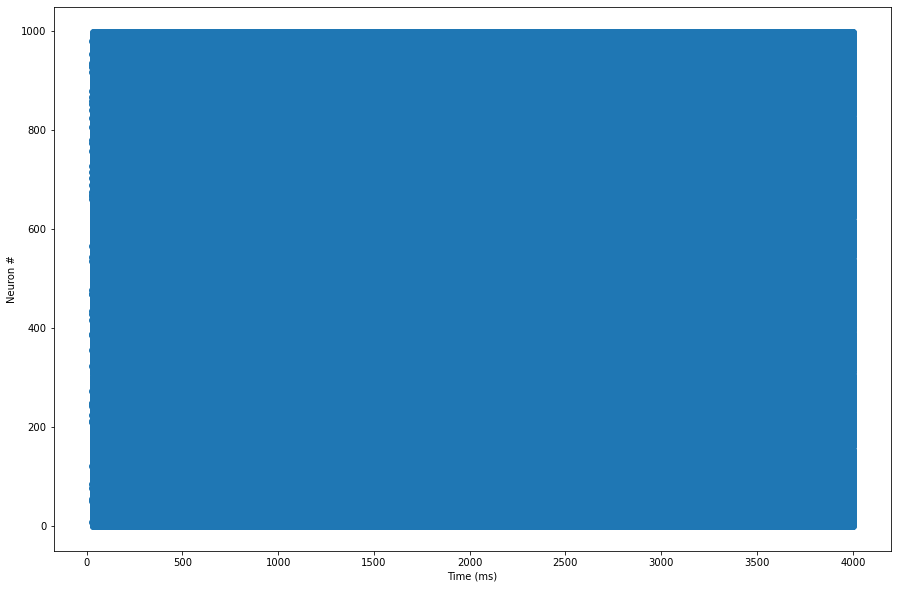

In [26]:
plt.figure(figsize=(15,10))
plt.xlabel('Time (ms)')
plt.ylabel('Neuron #')
plt.scatter(np.where(t_spike==1)[1], np.where(t_spike==1)[0])

In [23]:
np.where(t_spike==1)[0]

array([  0,   0,   0, ..., 999, 999, 999])

In [27]:
np.sum(t_spike==1)

2300950